In [2]:
import torch
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'torch'

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts image to tensor [0,1]
    transforms.Lambda(lambda t: (t * 2) - 1)  # Normalize to [-1, 1]
])

mnist = datasets.MNIST(root="data", train=True, download=True, transform=transform)
data_loader = torch.utils.data.DataLoader(mnist, batch_size=1, shuffle=True)


100%|██████████| 9.91M/9.91M [00:00<00:00, 57.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.69MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.2MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.77MB/s]


In [3]:
# Get one image from the data loader
image, label = next(iter(data_loader))

# Plot it
plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"Label: {label.item()}")
plt.axis("off")
plt.show()


NameError: name 'data_loader' is not defined

In [ ]:
T = 300  # Total diffusion steps

# Linearly spaced noise values from 0.0001 to 0.02
betas = torch.linspace(1e-4, 0.02, T)

# Alpha is the amount of "signal" we keep at each step
alphas = 1. - betas

# Cumulative product of alphas across all steps
alphas_cumprod = torch.cumprod(alphas, dim=0)


In [ ]:
def forward_diffusion_sample(x_0, t, device="cpu"):
    """
    Takes an image x_0 and a timestep t,
    returns the noised image x_t and the noise ε added.
    """
    noise = torch.randn_like(x_0)  # ε ~ N(0, 1), same shape as image

    # Get the square root of cumulative alpha at step t
    sqrt_alphas_cumprod = torch.sqrt(alphas_cumprod[t])[:, None, None, None]
    sqrt_one_minus_alphas_cumprod = torch.sqrt(1 - alphas_cumprod[t])[:, None, None, None]

    # Add noise using the diffusion formula
    x_t = sqrt_alphas_cumprod * x_0 + sqrt_one_minus_alphas_cumprod * noise
    return x_t, noise


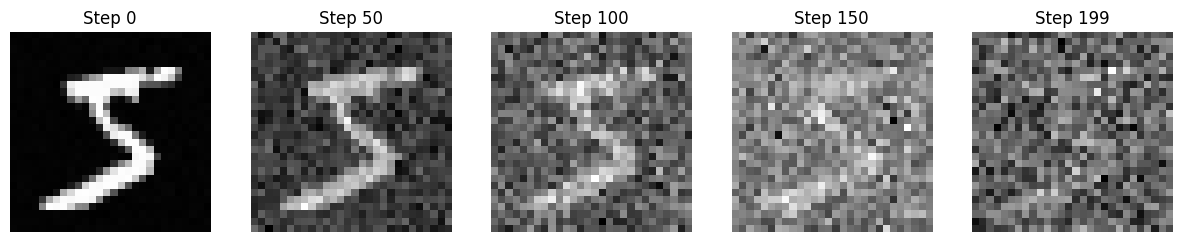

In [ ]:
def show_forward_diffusion(img, steps=[0, 50, 100, 150, 199]):
    """
    Visualize the image after different numbers of diffusion steps.
    """
    plt.figure(figsize=(15, 5))
    for i, t in enumerate(steps):
        t_batch = torch.tensor([t], dtype=torch.long)
        noisy_img, _ = forward_diffusion_sample(img, t_batch)
        plt.subplot(1, len(steps), i + 1)
        plt.imshow(noisy_img.squeeze().numpy(), cmap="gray")
        plt.title(f"Step {t}")
        plt.axis("off")
    plt.show()

# Take one image and visualize
image, _ = mnist[0]
image = image.unsqueeze(0)  # Add batch dimension (1, 1, 28, 28)
show_forward_diffusion(image)
